# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding="latin1")

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [2]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [3]:
df.groupby("FormalEducation").mean()["AdjustedCompensation"]


FormalEducation
Bachelor's degree                                                    6.488710e+04
Doctoral degree                                                      2.956618e+07
I did not complete any formal education past high school             5.931777e+04
I prefer not to answer                                               2.228557e+05
Master's degree                                                      6.913990e+04
Professional degree                                                  6.120670e+04
Some college/university study without earning a bachelor's degree    8.291218e+04
Name: AdjustedCompensation, dtype: float64

In [4]:
df.groupby("FormalEducation").median()["AdjustedCompensation"]


FormalEducation
Bachelor's degree                                                    38399.400
Doctoral degree                                                      74131.920
I did not complete any formal education past high school             39133.216
I prefer not to answer                                               83707.820
Master's degree                                                      53812.170
Professional degree                                                  40000.000
Some college/university study without earning a bachelor's degree    40986.000
Name: AdjustedCompensation, dtype: float64

In [5]:
bach = df[df["FormalEducation"] == "Bachelor's degree"]
mast = df[df["FormalEducation"] == "Master's degree"]

In [6]:
bach = bach[bach["AdjustedCompensation"].notna()]
mast = mast[mast["AdjustedCompensation"].notna()]

In [7]:
bach = bach[bach["AdjustedCompensation"]< 100000]
mast = mast[mast["AdjustedCompensation"]< 100000]

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


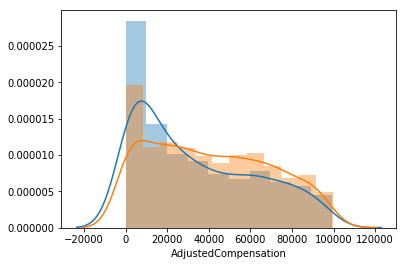

In [19]:
import seaborn as sns
sns.distplot(bach["AdjustedCompensation"])
sns.distplot(mast["AdjustedCompensation"])

In [9]:
def t_test_ind(x, y):
	import numpy as np
	return (y.mean() - x.mean()) \
/  (len(y) *  np.std(y) + len(x) * np.std(x) \
/  (len(x)  +  (len(y)  - 2)))

In [10]:
tval = t_test_ind(bach["AdjustedCompensation"], mast["AdjustedCompensation"])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


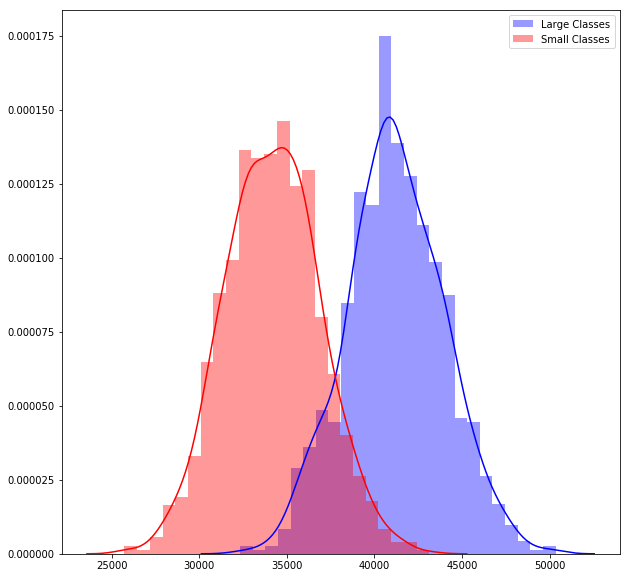

In [12]:
fig = plt.figure(figsize=(10,10))

large_samples = []
small_samples = []
for i in range(1000):
    sample1 = bach.sample(100)["AdjustedCompensation"]
    small_samples.append(sample1.mean())
    
    sample2 = mast.sample(100)["AdjustedCompensation"]
    large_samples.append(sample2.mean())

sns.distplot(large_samples, color="blue", label="Large Classes")
sns.distplot(small_samples, color="red", label="Small Classes")
plt.legend()


In [13]:
def cohen_d(x,y):
	import math
	import numpy as np
	nx = len(x)
	ny = len(y)
	dof = nx + ny - 2
	return (np.mean(x) - np.mean(y)) / math.sqrt(((nx-1)*np.std(x, ddof=(nx-1)) ** 2 + (ny-1)*np.std(y, ddof=(ny-1)) ** 2) / dof)

In [14]:
cohen_d(bach["AdjustedCompensation"], mast["AdjustedCompensation"])

-0.006802567483712137

In [15]:
import numpy as np
large_samples = np.array(large_samples)

In [16]:
from scipy import stats
t_crit = stats.norm.ppf(.05, loc=large_samples.mean(), scale=large_samples.std() )

tval_z = stats.norm.ppf(tval, loc=large_samples.mean() , scale=large_samples.std() )

In [17]:
print(tval_z)
print(t_crit)

# Based on t-test and difference in means/medians, 
# masters degrees return a higher level of adjusted compensation for each degree
# Can reject the null hypothesis, but effect size is low


31191.013405671067
36622.147950039456


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [18]:
doc = df[df["FormalEducation"] == "Doctoral degree"]
doc = doc[doc["AdjustedCompensation"].notna()]
doc = doc[doc["AdjustedCompensation"]< 100000]

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


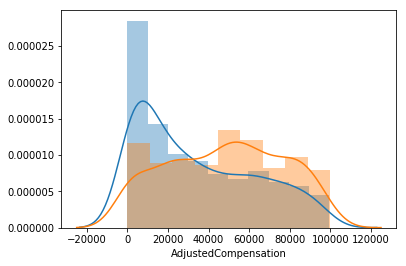

In [20]:
import seaborn as sns
sns.distplot(bach["AdjustedCompensation"])
sns.distplot(doc["AdjustedCompensation"])

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


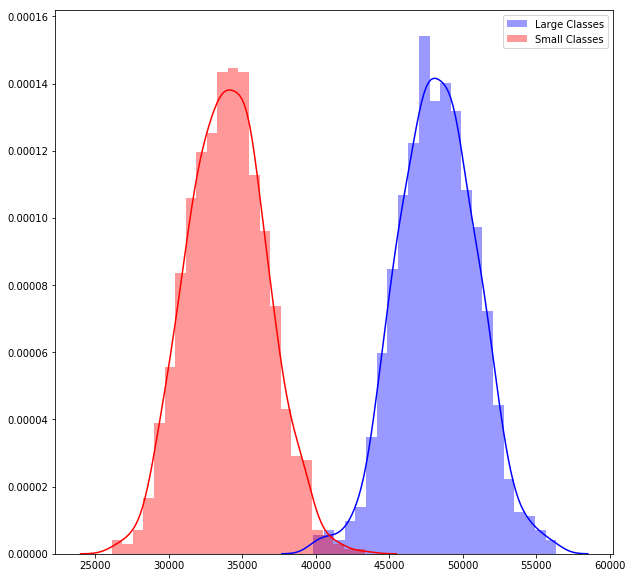

In [21]:
fig = plt.figure(figsize=(10,10))

large_samples = []
small_samples = []
for i in range(1000):
    sample1 = bach.sample(100)["AdjustedCompensation"]
    small_samples.append(sample1.mean())
    
    sample2 = doc.sample(100)["AdjustedCompensation"]
    large_samples.append(sample2.mean())

sns.distplot(large_samples, color="blue", label="Large Classes")
sns.distplot(small_samples, color="red", label="Small Classes")
plt.legend()

In [22]:
cohen_d(bach["AdjustedCompensation"], doc["AdjustedCompensation"])

-0.017645643821933798

In [24]:
large_samples = np.array(large_samples)
t_crit = stats.norm.ppf(.05, loc=large_samples.mean(), scale=large_samples.std() )

tval_z = stats.norm.ppf(tval, loc=large_samples.mean() , scale=large_samples.std() )

In [26]:
print(tval_z)
print(t_crit)
tval_z < t_crit

38637.92816920747
43866.034340684484


True

In [ ]:
# p < alpha(.05) and substantially so. effect size is decent. 
# reject the null hypothesis that bachelors degrees and 
# doctoral degree students are the same for compensation

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [34]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [28]:
df2 = df[df["AdjustedCompensation"]< 100000]
df2 = df2[df2["AdjustedCompensation"].notna()]

In [29]:
df2.columns


Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

In [32]:
formula = "AdjustedCompensation~C(FormalEducation)"
lm = ols(formula, df2).fit()

In [35]:
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  9.150122e+10     6.0  18.602856  2.208619e-21
Residual            2.699527e+12  3293.0        NaN           NaN


In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     AdjustedCompensation   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.031
Method:                   Least Squares   F-statistic:                     18.60
Date:                  Tue, 11 Jun 2019   Prob (F-statistic):           2.21e-21
Time:                          13:35:40   Log-Likelihood:                -38544.
No. Observations:                  3300   AIC:                         7.710e+04
Df Residuals:                      3293   BIC:                         7.715e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                3.404e+04    950.178     35.827      0.000    3.22e+04    3.59e+04
C(FormalEducation)[T.Doctoral degree]                                                    1.427e+04   1487.410      9.594      0.000    1.14e+04    1.72e+04
C(FormalEducation)[T.I did not complete any formal education past high school]            827.8175   5921.168      0.140      0.889   -1.08e+04    1.24e+04
C(FormalEducation)[T.I prefer not to answer]                                             2.998e+04   1.28e+04      2.335      0.020    4806.240    5.52e+04
C(FormalEducation)[T.Master's degree]                                                    7087.6432   1196.121      5.926      0.000    4742.427    9432.860
C(FormalEducation)[T.Professional degree]                                                3086.6927   2951.312      1.046      0.296   -2699.900    8873.285
C(FormalEducation)[T.Some college/university study without earning a bachelor's degree] -5115.2461   3358.537     -1.523      0.128   -1.17e+04    1469.785
==============================================================================
Omnibus:                      880.634   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.393
Skew:                           0.298   Prob(JB):                     1.67e-42
Kurtosis:                       1.978   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Doctoral degree has the highest t-value, double that of a masters degree, and is clearly the most important factor in adj

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!